In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

Sources:

- Wikipedia

  - `[Lor_WP]` [Lorenz sytem](https://en.wikipedia.org/wiki/Lorenz_system)

## ---- Atmospheric convection ----

## ---- Lorenz system ----

(See `[Lor_WP]`)

**Definition**

In 1963, Edward Lorenz developed a simplified mathematical model for atmospheric convection. The model is a system of three ordinary differential equations now known as the Lorenz equations:

$$
\frac{dx}{dt} = \sigma(y-x)\\
\frac{dy}{dt} = x(\rho-z) - y\\
\frac{dz}{dt} = xy - \beta z
$$



The equations relate the properties of a two-dimensional fluid layer uniformly warmed from below and cooled from above, with:

- $x$ is proportional to the rate of convection, 
- $y$ is proportionalto the horizontal temperature variation
- $z$ is proportional to the vertical temperature variation.
- The constants $\sigma$, $\rho$ , $\beta$ are system parameters proportional to the Prandtl number, Rayleigh number, and certain physical dimensions of the layer itself

**Properties**

For generic values of $\sigma$, $\rho$ , $\beta$, the Lorenz system is 

- Nonlinear
- Non-periodic
- Three-dimensional
- Seterministic

With the following constants (and nearby values) $\sigma=10, \beta=8/3, \rho=28$, the Lorenz is in addition:

- Chaotic
- Almost all initial points will tend to an invariant set – the Lorenz attractor – a strange attractor with 3 equilibra

In [7]:


rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def lorenz(state, t):  # Param t is required by odeint
    x, y, z = state    # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

t = np.arange(0.0, 40.0, 0.01) # A sequence of time points for which to solve for state

### ---- Phase space ----

Phase space plots can be used to show regions of stability.

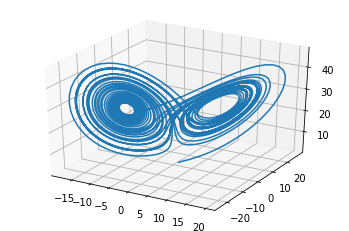

In [6]:
# Numericaly solve the lorenz system given state0 as initial contidion
state0 = [1.0, 1.0, 1.0]      
states = odeint(lorenz, state0, t)  

# Phase space: type of plots used to 
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()